In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import quack.schedule.multi_qubit as sims
import importlib
import pickle

## Schedules for a chain of 3 qubits

In [2]:
importlib.reload(sims);
i_c = 230; c_shunt = 50; c_z = 4.4; lq = 480; alpha = 0.4; d = 0.0
qubit0 = sims.CSFQ(i_c, c_shunt, c_z, lq, alpha, d, 5, 10, 10)
qubit1 = sims.CSFQ(i_c, c_shunt, c_z, lq, alpha, d, 5, 10, 10)
qubit2 = sims.CSFQ(i_c, c_shunt, c_z, lq, alpha, d, 5, 10, 10)

i_sigma = 565; c_sigma = 11; lc = 580; d = 0.0
coupler01 = sims.Coupler(i_sigma, c_sigma, lc, d)
coupler12 = sims.Coupler(i_sigma, c_sigma, lc, d)

elements = [qubit0, coupler01, qubit1, coupler12, qubit2]

# couple qubits in a chain
m = 65; m_mat = np.zeros((5, 5));
m_mat[0, 1] = m; m_mat[1, 2] = m;
m_mat[2, 3] = -m; m_mat[3, 4] = m;
m_mat = -(m_mat + m_mat.T)

trunc_vec = np.array([6, 3, 6, 3, 6])

circuit = sims.MultiQubit(elements, m_mat, trunc_vec)

In [3]:
phi_dict = {}; pts = 20;
s = np.linspace(0, 1, pts)
phi_dict["points"] = pts

phi_dict["phix_0"] = np.linspace(0.73, 1, pts)*2*np.pi
phi_dict["phix_1"] = np.linspace(0.5, 1, pts)*2*np.pi
phi_dict["phix_2"] = np.linspace(0.73, 0.85, pts)*2*np.pi
phi_dict["phix_3"] = np.linspace(0.5, 0.85, pts)*2*np.pi
phi_dict["phix_4"] = np.linspace(0.75, 1, pts)*2*np.pi

phi_dict["phiz_0"] = np.linspace(0.0, 0.002, pts)*2*np.pi
phi_dict["phiz_1"] = np.linspace(0, 0, pts)*2*np.pi
phi_dict["phiz_2"] = np.linspace(0, 0.001, pts)*2*np.pi
phi_dict["phiz_3"] = np.linspace(0, 0, pts)*2*np.pi
phi_dict["phiz_4"] = np.linspace(0, 0.002, pts)*2*np.pi

In [4]:
%%time
# calculate Ising coefficients using full SW method

ising_sw_dict = circuit.get_ising_sw(phi_dict, verbose=True)

CPU times: user 44min 12s, sys: 10min 37s, total: 54min 49s
Wall time: 5min 31s


In [18]:
# with open('./data/3q_schedule.pkl', 'wb') as file:
#     pickle.dump(ising_sw_dict, file)

In [4]:
%%time
# calculate Ising coefficients using pair-wise method

ising_pwsw_dict = circuit.get_ising_pwsw(phi_dict, verbose=True)

calculating qubit isings for qubit 1 of 3
calculating qubit isings for qubit 2 of 3
calculating qubit isings for qubit 3 of 3
calculating coupling strength for coupler 1 of 2
calculating coupling strength for coupler 2 of 2
CPU times: user 4min 22s, sys: 4min 24s, total: 8min 47s
Wall time: 1min 11s


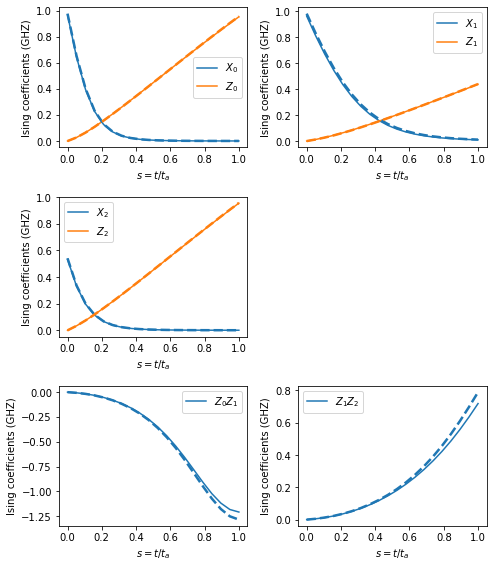

In [7]:
plt.clf();
fig = plt.figure(num=1);
fig.set_size_inches((7, 8))

for i in range(3):
    ax1 = plt.subplot(3, 2, i+1)
    
    plt.plot(s, ising_sw_dict["x_"+str(i)]/2/np.pi, label=r"$X_{0:d}$".format(i), color="C0")
    plt.plot(s, ising_sw_dict["z_"+str(i)]/2/np.pi, label=r"$Z_{0:d}$".format(i), color="C1")
    
    plt.plot(s, ising_pwsw_dict["x_"+str(i)]/2/np.pi, color="C0", ls='--', lw=2.5 )
    plt.plot(s, ising_pwsw_dict["z_"+str(i)]/2/np.pi, color="C1", ls='--', lw=2.5 )
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"Ising coefficients (GHZ)")
    plt.legend()
    
labels = [[0, 1], [1, 2]]
for i in range(2):
    ax2 = plt.subplot(3, 2, i+5)
    
    plt.plot(s, ising_sw_dict["zz_"+str(labels[i][0])+str(labels[i][1])]/2/np.pi, 
             label=r"$Z_{0:d}Z_{1:d}$".format(labels[i][0], labels[i][1]))
    
    plt.plot(s, ising_pwsw_dict["zz_"+str(labels[i][0])+str(labels[i][1])]/2/np.pi, color="C0", ls='--', lw=2.5 )
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"Ising coefficients (GHZ)")
    plt.legend()
    
plt.tight_layout()
# plt.savefig("./plots/schedules.pdf", bbox_inches="tight")
plt.show()

## Fluxes for a chain of 3 qubits

In [53]:
importlib.reload(sims);
i_c = 230; c_shunt = 50; c_z = 4.4; lq = 480; alpha = 0.4; d = 0.0
qubit0 = sims.CSFQ(i_c, c_shunt, c_z, lq, alpha, d, 5, 10, 10)
qubit1 = sims.CSFQ(i_c, c_shunt, c_z, lq, alpha, d, 5, 10, 10)
qubit2 = sims.CSFQ(i_c, c_shunt, c_z, lq, alpha, d, 5, 10, 10)

i_sigma = 565; c_sigma = 11; lc = 580; d = 0.0
coupler01 = sims.Coupler(i_sigma, c_sigma, lc, d)
coupler12 = sims.Coupler(i_sigma, c_sigma, lc, d)

elements = [qubit0, coupler01, qubit1, coupler12, qubit2]

# couple qubits in a chain
m = 65; m_mat = np.zeros((5, 5));
m_mat[0, 1] = m; m_mat[1, 2] = m;
m_mat[2, 3] = -m; m_mat[3, 4] = m;
m_mat = -(m_mat + m_mat.T)

trunc_vec = np.array([6, 3, 6, 3, 6])

circuit = sims.MultiQubit(elements, m_mat, trunc_vec)

In [19]:
with open('./data/3q_schedule.pkl', 'rb') as file:
    ising_sw_dict = pickle.load(file)
s = np.linspace(0, 1, ising_sw_dict["points"])

In [7]:
%%time

custom_flux_dict_num = circuit.get_custom_fluxes_num(ising_sw_dict, verbose=True, optimizer_method="leastsq")

CPU times: user 1d 5h 18min 17s, sys: 8h 35min 45s, total: 1d 13h 54min 2s
Wall time: 4h 8min 2s


In [8]:
# with open('./data/3q_flux_num.pkl', 'wb') as file:
#     pickle.dump(custom_flux_dict_num, file)

In [21]:
with open('./data/3q_flux_num.pkl', 'rb') as file:
    custom_flux_dict_num = pickle.load(file)

In [22]:
%%time

custom_flux_dict_pwsw = circuit.get_custom_fluxes_pwsw(ising_sw_dict, verbose=True, optimizer_method="leastsq")

calculating qubit biases for qubit 1 of 3
calculating qubit biases for qubit 2 of 3
calculating qubit biases for qubit 3 of 3
schedule point 20 / 20
 calculating coupler bias for coupler 1 of 2
schedule point 20 / 20
 calculating coupler bias for coupler 2 of 2
CPU times: user 31min 2s, sys: 31min 33s, total: 1h 2min 36s
Wall time: 7min 8s


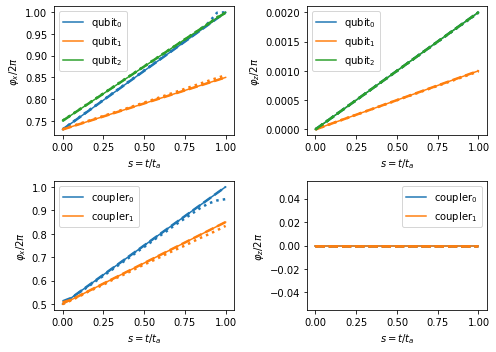

In [104]:
plt.clf();
fig = plt.figure(num=1);
fig.set_size_inches((7, 5))

ax1 = plt.subplot(2, 2, 1)
for i, qubit_index in enumerate(circuit.qubit_indices):
    
    plt.plot(s, phi_dict["phix_"+str(qubit_index)]/2/np.pi, label=r"qubit$_{0:d}$".format(i))
    plt.plot(s, custom_flux_dict_pwsw["phix_"+str(qubit_index)]/2/np.pi, ':', color="C{0:d}".format(i), lw=2.5)
    plt.plot(s, custom_flux_dict_num["phix_"+str(qubit_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5)
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_x/2\pi$")
    plt.legend()

ax2 = plt.subplot(2, 2, 2)
for i, qubit_index in enumerate(circuit.qubit_indices):
    
    plt.plot(s, phi_dict["phiz_"+str(qubit_index)]/2/np.pi, label=r"qubit$_{0:d}$".format(i))
    plt.plot(s, custom_flux_dict_pwsw["phiz_"+str(qubit_index)]/2/np.pi, ':', color="C{0:d}".format(i), lw=2.5)
    plt.plot(s, custom_flux_dict_num["phiz_"+str(qubit_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5)
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_z/2\pi$")
    plt.legend()
    
ax3 = plt.subplot(2, 2, 3)
# plt.hlines(1, 0, 1, alpha=0.3)
for i, coupler_index in enumerate(circuit.coupler_indices):
    
    plt.plot(s, phi_dict["phix_"+str(coupler_index)]/2/np.pi, label=r"coupler$_{0:d}$".format(i))
    plt.plot(s, custom_flux_dict_pwsw["phix_"+str(coupler_index)]/2/np.pi, ':', color="C{0:d}".format(i), lw=2.5)
    plt.plot(s, custom_flux_dict_num["phix_"+str(coupler_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5)
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_x/2\pi$")
    plt.legend()
    
ax4 = plt.subplot(2, 2, 4)
for i, coupler_index in enumerate(circuit.coupler_indices):
    
    plt.plot(s, phi_dict["phiz_"+str(coupler_index)]/2/np.pi, label=r"coupler$_{0:d}$".format(i))
    plt.plot(s, custom_flux_dict_pwsw["phiz_"+str(coupler_index)]/2/np.pi, ':', color="C{0:d}".format(i), lw=2.5)
    plt.plot(s, custom_flux_dict_num["phiz_"+str(coupler_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5)
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_z/2\pi$")
    plt.legend()
    
    
plt.tight_layout()
# plt.savefig("./plots/fluxes.pdf", bbox_inches="tight")
plt.show()

In [23]:
%%time

ising_sw_from_num = circuit.get_ising_sw(custom_flux_dict_num, verbose=True)
ising_sw_from_pwsw = circuit.get_ising_sw(custom_flux_dict_pwsw, verbose=True)

CPU times: user 46min 47s, sys: 15min 5s, total: 1h 1min 53s
Wall time: 6min 56s


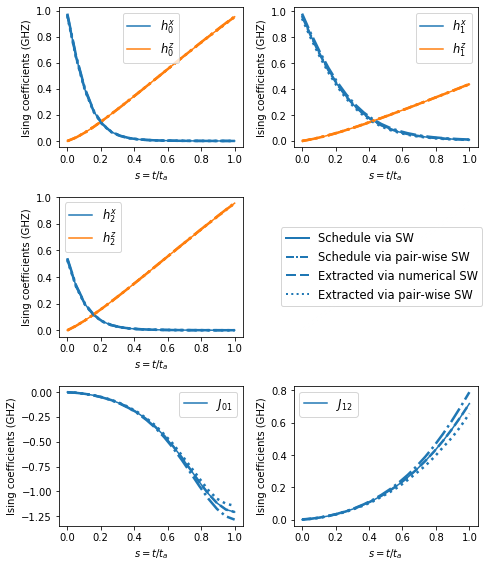

In [32]:
plt.clf();
fig = plt.figure(num=1);
fig.set_size_inches((7, 8))

for i in range(3):
    ax1 = plt.subplot(3, 2, i+1)
    
    plt.plot(s, ising_sw_dict["x_"+str(i)]/2/np.pi, label=r"$h^x_{0:d}$".format(i), color="C0")
    plt.plot(s, ising_sw_dict["z_"+str(i)]/2/np.pi, label=r"$h^z_{0:d}$".format(i), color="C1")
    
    plt.plot(s, ising_pwsw_dict["x_"+str(i)]/2/np.pi, color="C0", ls='-.', lw=2.5 )
    plt.plot(s, ising_pwsw_dict["z_"+str(i)]/2/np.pi, color="C1", ls='-.', lw=2.5 )
    
    plt.plot(s, ising_sw_from_num["x_"+str(i)]/2/np.pi, color="C0", ls='--', lw=2.5 )
    plt.plot(s, ising_sw_from_num["z_"+str(i)]/2/np.pi, color="C1", ls='--', lw=2.5 )
    
    plt.plot(s, ising_sw_from_pwsw["x_"+str(i)]/2/np.pi, color="C0", ls=':', lw=2.5 )
    plt.plot(s, ising_sw_from_pwsw["z_"+str(i)]/2/np.pi, color="C1", ls=':', lw=2.5 )
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"Ising coefficients (GHZ)")
    plt.legend(fontsize=11.5)
    
ax3 = plt.subplot(3, 2, 4)
plt.axis('off')
plt.plot(s, s, lw=2, label="Schedule via SW")
plt.plot(s, s, color="C0", ls=(0, (4, 1, 1, 1)), lw=2, label="Schedule via pair-wise SW")
plt.plot(s, s, color="C0", ls=(0, (5, 2)), lw=2, label="Extracted via numerical SW")
plt.plot(s, s, color="C0", ls=":", lw=2, label="Extracted via pair-wise SW")
plt.plot(s, s, color='w', lw=4)
plt.legend(bbox_to_anchor=(-0.1, 0.5), loc='center left', fontsize=11.5)
    
labels = [[0, 1], [1, 2]]
for i in range(2):
    ax2 = plt.subplot(3, 2, i+5)
    
    plt.plot(s, ising_sw_dict["zz_"+str(labels[i][0]) + ',' + str(labels[i][1])]/2/np.pi, 
             label=r"$J_{{{0:d}{1:d}}}$".format(labels[i][0], labels[i][1]))
    
    plt.plot(s, ising_pwsw_dict["zz_"+str(labels[i][0])+',' +str(labels[i][1])]/2/np.pi, color="C0", ls='-.', lw=2.5 )
    
    plt.plot(s, ising_sw_from_num["zz_"+str(labels[i][0])+',' +str(labels[i][1])]/2/np.pi, color="C0", ls='--', lw=2.5 )
    
    plt.plot(s, ising_sw_from_pwsw["zz_"+str(labels[i][0])+',' +str(labels[i][1])]/2/np.pi, color="C0", ls=':', lw=2.5 )
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"Ising coefficients (GHZ)")
    plt.legend(fontsize=11.5)
    
plt.tight_layout()
# plt.savefig("./plots/schedules_all.pdf", bbox_inches="tight")
plt.show()

# asymmetry correction for fluxes

In [154]:
importlib.reload(sims);
i_c = 230; c_shunt = 50; c_z = 4.4; lq = 480; alpha = 0.4; d = 0.1
qubit0 = sims.CSFQ(i_c, c_shunt, c_z, lq, alpha, d, 5, 10, 10)
qubit1 = sims.CSFQ(i_c, c_shunt, c_z, lq, alpha, d, 5, 10, 10)
qubit2 = sims.CSFQ(i_c, c_shunt, c_z, lq, alpha, d, 5, 10, 10)

i_sigma = 565; c_sigma = 11; lc = 580; d = 0.1
coupler01 = sims.Coupler(i_sigma, c_sigma, lc, d)
coupler12 = sims.Coupler(i_sigma, c_sigma, lc, d)

elements = [qubit0, coupler01, qubit1, coupler12, qubit2]

# couple qubits in a chain
m = 65; m_mat = np.zeros((5, 5));
m_mat[0, 1] = m; m_mat[1, 2] = m;
m_mat[2, 3] = -m; m_mat[3, 4] = m;
m_mat = -(m_mat + m_mat.T)

trunc_vec = np.array([6, 3, 6, 3, 6])

circuit = sims.MultiQubit(elements, m_mat, trunc_vec)

In [155]:
phi_dict = {}; pts = 20;
s = np.linspace(0, 1, pts)
phi_dict["points"] = pts

phi_dict["phix_0"] = np.linspace(0.73, 1, pts)*2*np.pi
phi_dict["phix_1"] = np.linspace(0.5, 1, pts)*2*np.pi
phi_dict["phix_2"] = np.linspace(0.73, 0.85, pts)*2*np.pi
phi_dict["phix_3"] = np.linspace(0.5, 0.85, pts)*2*np.pi
phi_dict["phix_4"] = np.linspace(0.75, 1, pts)*2*np.pi

phi_dict["phiz_0"] = np.linspace(0.0, 0.002, pts)*2*np.pi
phi_dict["phiz_1"] = np.linspace(0, 0, pts)*2*np.pi
phi_dict["phiz_2"] = np.linspace(0, 0.001, pts)*2*np.pi
phi_dict["phiz_3"] = np.linspace(0, 0, pts)*2*np.pi
phi_dict["phiz_4"] = np.linspace(0, 0.002, pts)*2*np.pi

In [156]:
phi_dict_asym = circuit._apply_asymmetry_shifts(phi_dict)

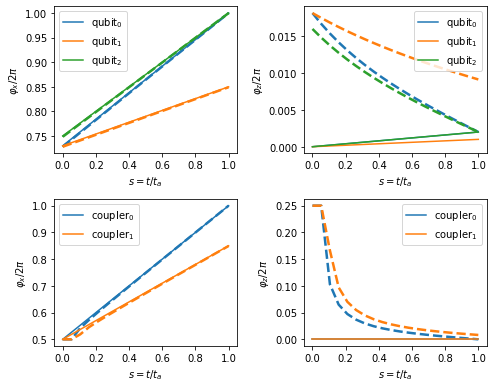

In [163]:
plt.clf();
fig = plt.figure(num=1);
fig.set_size_inches((7, 5.5))
# fig.set_size_inches((12, 8))

ax1 = plt.subplot(2, 2, 1)
for i, qubit_index in enumerate(circuit.qubit_indices):
    
    plt.plot(s, phi_dict["phix_"+str(qubit_index)]/2/np.pi, label=r"qubit$_{0:d}$".format(i))
    plt.plot(s, phi_dict_asym["phix_"+str(qubit_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5)
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_x/2\pi$")
    plt.legend()

ax2 = plt.subplot(2, 2, 2)
for i, qubit_index in enumerate(circuit.qubit_indices):
    
    plt.plot(s, phi_dict["phiz_"+str(qubit_index)]/2/np.pi, label=r"qubit$_{0:d}$".format(i))
    plt.plot(s, phi_dict_asym["phiz_"+str(qubit_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5)
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_z/2\pi$")
    plt.legend()
    
ax3 = plt.subplot(2, 2, 3)
# plt.hlines(1, 0, 1, alpha=0.3)
for i, coupler_index in enumerate(circuit.coupler_indices):
    
    plt.plot(s, phi_dict["phix_"+str(coupler_index)]/2/np.pi, label=r"coupler$_{0:d}$".format(i))
    plt.plot(s, phi_dict_asym["phix_"+str(coupler_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5)
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_x/2\pi$")
    plt.legend()
    
ax4 = plt.subplot(2, 2, 4)
for i, coupler_index in enumerate(circuit.coupler_indices):
    
    plt.plot(s, phi_dict["phiz_"+str(coupler_index)]/2/np.pi, label=r"coupler$_{0:d}$".format(i))
    plt.plot(s, phi_dict_asym["phiz_"+str(coupler_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5)
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_z/2\pi$")
    plt.legend()
    
    
plt.tight_layout()
# plt.savefig("./plots/fluxes_asym.pdf", bbox_inches="tight")
plt.show()

In [164]:
%%time
# calculate Ising coefficients using full SW method

ising_sw_asym = circuit.get_ising_sw(phi_dict_asym, verbose=True)

CPU times: user 44min 36s, sys: 11min 39s, total: 56min 15s
Wall time: 5min 39s


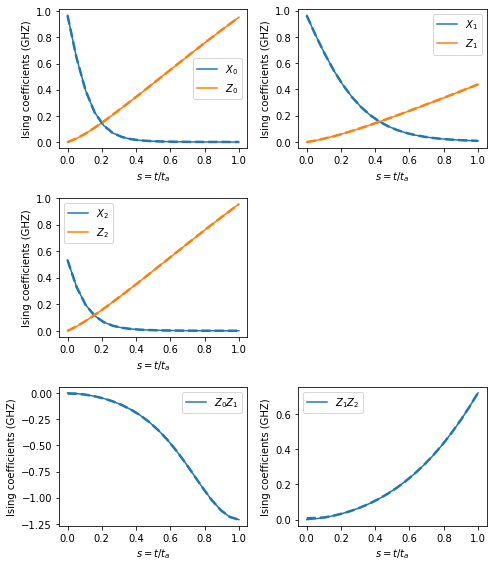

In [165]:
plt.clf();
fig = plt.figure(num=1);
fig.set_size_inches((7, 8))

for i in range(3):
    ax1 = plt.subplot(3, 2, i+1)
    
    plt.plot(s, ising_sw_dict["x_"+str(i)]/2/np.pi, label=r"$X_{0:d}$".format(i), color="C0")
    plt.plot(s, ising_sw_dict["z_"+str(i)]/2/np.pi, label=r"$Z_{0:d}$".format(i), color="C1")
    
    plt.plot(s, ising_sw_asym["x_"+str(i)]/2/np.pi, color="C0", ls='--', lw=2.5 )
    plt.plot(s, ising_sw_asym["z_"+str(i)]/2/np.pi, color="C1", ls='--', lw=2.5 )
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"Ising coefficients (GHZ)")
    plt.legend()
    
labels = [[0, 1], [1, 2]]
for i in range(2):
    ax2 = plt.subplot(3, 2, i+5)
    
    plt.plot(s, ising_sw_dict["zz_"+str(labels[i][0])+str(labels[i][1])]/2/np.pi, 
             label=r"$Z_{0:d}Z_{1:d}$".format(labels[i][0], labels[i][1]))
    
    plt.plot(s, ising_sw_asym["zz_"+str(labels[i][0])+str(labels[i][1])]/2/np.pi, color="C0", ls='--', lw=2.5 )
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"Ising coefficients (GHZ)")
    plt.legend()
    
plt.tight_layout()
# plt.savefig("./plots/3q_schedules.pdf", bbox_inches="tight")
plt.show()